In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv("Heapsort-k64-n4096-low1800-high360-frekv125.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df4k = pd.read_csv("heapsort-k16-n4096.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df6k = pd.read_csv("heapsort-k16-n6144.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df8k = pd.read_csv("heapsort-k16-n8192.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])

df10k = pd.read_csv("heapsort-k16-n10240.csv", header = 0, delimiter = ";", decimal = ",",names=['nb','time','minutes','datetime','Current'])




In [3]:
# Gets the index of all measurements considered a spike
def getSpikeList(df, limit):
    spikeindexlist = []
    for i in range(0, df['nb'].max()+1):
        if df['Current'][i] > limit:
            spikeindexlist.append(i)
    return spikeindexlist

In [4]:
# Gets the times of each loop and how many loops there are
def findTimes(spikes, df, dataRange):
    loopTimeList = []
    i = 0
    while i <= dataRange: 
        if i not in spikes:
            loopStart = df['time'][i]
            while i not in spikes:
                loopStop = df['time'][i]
                i +=1
            loopTimeList.append(loopStop - loopStart)
        i +=1
    print("Number of loops: ")
    print(len(loopTimeList))
    return loopTimeList

In [5]:
# Calculates the avarage time of the loops
def avgTimeLoop(loopTimeList):
    time = sum(loopTimeList)/len(loopTimeList)
    print("Avarage time of loop: ")
    print(time)
    print("[s]")
    return time

In [6]:
# Calculates the avarage time of one iteration 
def avgTimeIteration(looptime, repetitions):
    time = looptime / repetitions
    print("\nAvarage time of one Iteration: ")
    print(time)
    print("[s]")
    return time

In [7]:
# Calculates the avarage current during one iteration
def avgCurrent(df, spikeList):
    sumCurrent = 0;
    dataPoints = 0;
    for i in range(df['nb'].iloc[-1]):
        if i not in spikeList:
            sumCurrent += df['Current'][i]
            dataPoints += 1
    current = sumCurrent / dataPoints
    print("\nAvarage Current in one iteration: ")
    print(current)
    print("[mA]")
    return current

In [8]:
# Full data processing
def runData(df, energyLimit, timeRepetion, loopRepititions, name):
    print(name)
    dataRange = df['time'].iloc[-1]
    
    plot = sns.scatterplot(data=df, x = 'time', y = 'Current')
    plot.set(xlim =(0, dataRange), ylim = (0, 0.2), title="Energy")
    plt.show()
    
    spikes = getSpikeList(df, energyLimit)
    timelist = findTimes(spikes,df, dataRange)
    hist = sns.histplot(data=timelist, kde=True)
    hist.set(ylim = (0,timeRepetion), title="Times")
    plt.show()
    
    looptime = avgTimeLoop(timelist)
    avgTimeIteration(looptime, loopRepititions)
    avgCurrent(df, spikes)

FPGA k: 16 n: 4K


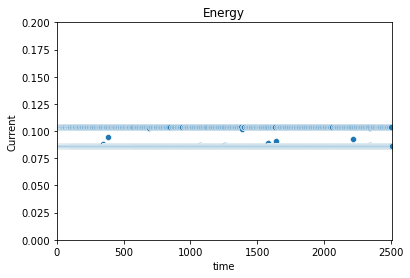

Number of loops: 
368


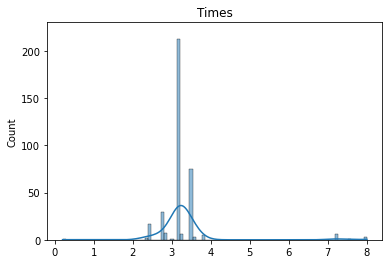

Avarage time of loop: 
3.299269021739134
[s]

Avarage time of one Iteration: 
0.002128560659186538
[s]

Avarage Current in one iteration: 
0.08623775549862887
[mA]


In [9]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df4k, 0.09,                     230,       1550,              "FPGA k: 16 n: 4K")

FPGA k: 16 n: 6K


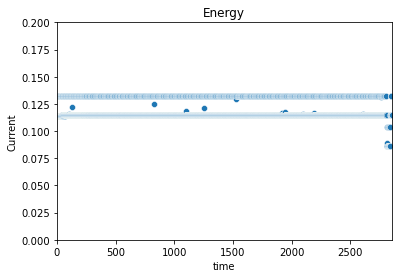

Number of loops: 
355


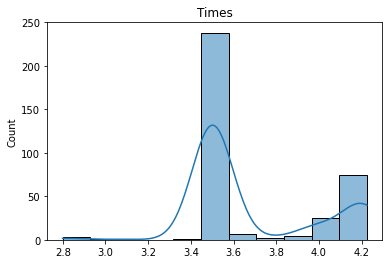

Avarage time of loop: 
3.682143661971834
[s]

Avarage time of one Iteration: 
0.0035645146776106815
[s]

Avarage Current in one iteration: 
0.11414196784397343
[mA]


In [10]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df6k, 0.125,                    250,       1033,              "FPGA k: 16 n: 6K")

FPGA k: 16 n: 8K


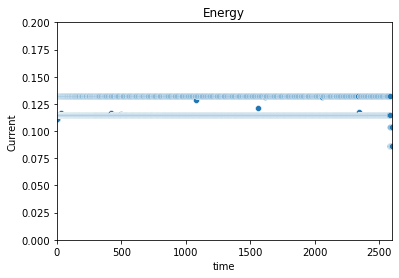

Number of loops: 
316


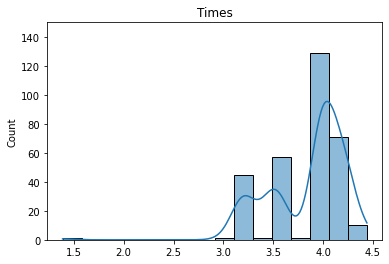

Avarage time of loop: 
3.8422531645569644
[s]

Avarage time of one Iteration: 
0.00495774601878318
[s]

Avarage Current in one iteration: 
0.1144229660504848
[mA]


In [11]:
#      (Data, Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df8k, 0.125,                    150,       775,               "FPGA k: 16 n: 8K")

FPGA k: 16 n: 10K


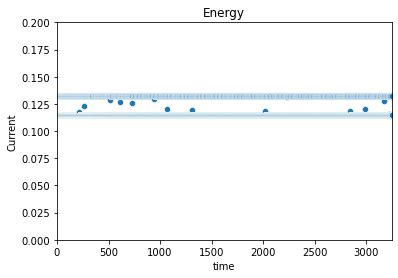

Number of loops: 
317


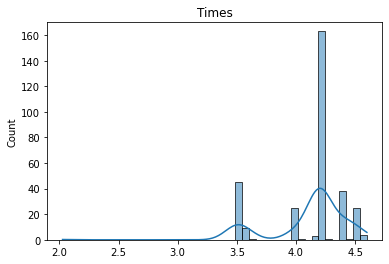

Avarage time of loop: 
4.11201261829653
[s]

Avarage time of one Iteration: 
0.006632278416607307
[s]

Avarage Current in one iteration: 
0.11458742980997376
[mA]


In [15]:
#      (Data,  Greater than means spike, hist ylim, Repetions in loop, Name)
runData(df10k, 0.125,                    170,       620,               "FPGA k: 16 n: 10K")